In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [197]:
#print cleaned dataset
DatabaseDF = pd.read_csv("CleanedDataset.csv")
DatabaseDF.head()

Unnamed: 0    Operator Well Name Formation  Lateral Length  Stages  \
0           0  Operator 1    Well 1       MBH          5114.0    30.0   
1           1  Operator 2    Well 2       MBH          5181.0     NaN   
2           2  Operator 2    Well 3       MBH          4780.0    15.0   
3           3  Operator 1    Well 4       MBH         10654.0     1.0   
4           4  Operator 2    Well 5       MBH          5209.0     1.0   

   Township   Range  Section  Total Prop, lbs  ...  Fluid Type from DI  \
0        141     99       10              0.0  ...                 NaN   
1        142     99       16         418000.0  ...                 NaN   
2        142     99       24         568407.0  ...                 NaN   
3        142     99        1         845000.0  ...                 NaN   
4        142     99       35         297366.0  ...                 NaN   

  SPACING_CAPPED  12 month Cum Prod  Completion Type  Sleeves  P&P  \
0          660.0              33.55              NaN      NaN  NaN   
1          660.0              27.62              NaN      NaN  NaN   
2          660.0              11.19               OH      NaN  NaN   
3          660.0              27.85              NaN      NaN  NaN   
4          660.0              50.88               OH      NaN  NaN   

   Frac Ports Repeater Ports  CT  Year Drilled  
0         NaN            NaN NaN        2006.0  
1         NaN            NaN NaN        2005.0  
2         NaN            NaN NaN        2006.0  
3         NaN            NaN NaN        2007.0  
4         NaN            NaN NaN        2006.0  

[5 rows x 30 columns]

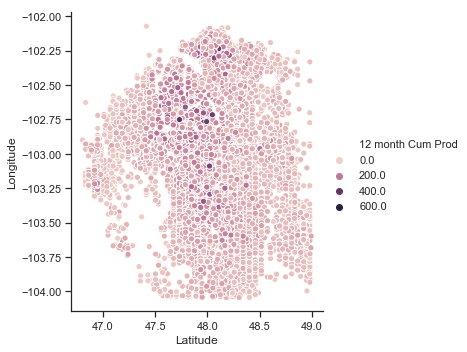

In [198]:
#Latitude vs Longitude
sns.relplot(x = 'Latitude', y = 'Longitude', hue = '12 month Cum Prod',data = DatabaseDF)

The production values are relatively higher around the middle of the graph, where the latitude is near 48.0 and the longitude is near -103.00 

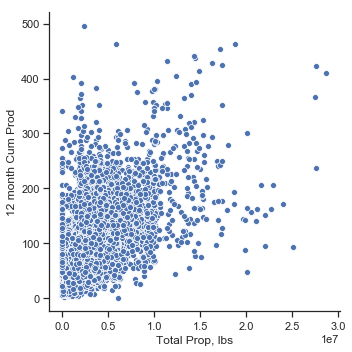

In [199]:
#Total Proppant vs 12 Month Cumulative Production
sns.relplot(x = "Total Prop, lbs", y = "12 month Cum Prod", data = DatabaseDF)

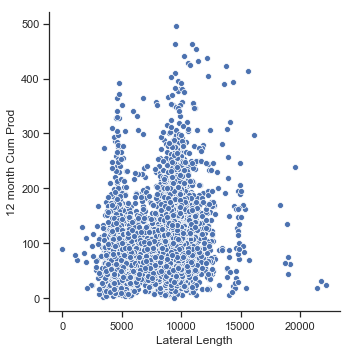

In [200]:
#Lateral Length vs 12 Month Cumulative Production
sns.relplot(x = "Lateral Length", y = "12 month Cum Prod", data = DatabaseDF)

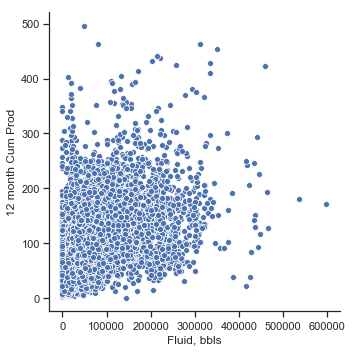

In [201]:
#Fluid vs 12 Month Cumulative Production
sns.relplot(x = "Fluid, bbls", y = "12 month Cum Prod", data = DatabaseDF)

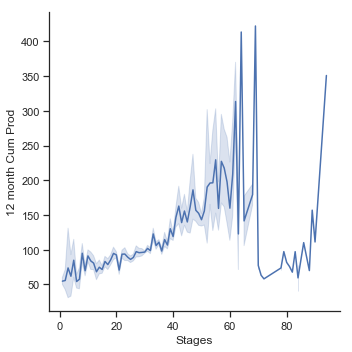

In [202]:
#Stages vs 12 Month Cumulative Production
sns.relplot(x = "Stages", y = "12 month Cum Prod", data = DatabaseDF, kind = "line")

The production is at its highest when there are around 60 to 85 stages. It is at its lowest in the range 0 to 20 stages.

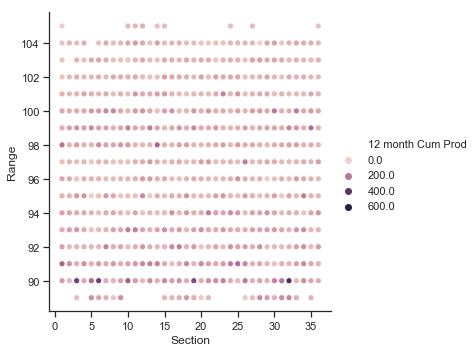

In [203]:
#Section vs Range
sns.relplot(x = "Section", y = "Range", hue = '12 month Cum Prod', data = DatabaseDF)

This graph does not show much, but the production is relatively higher when the range is near 90.

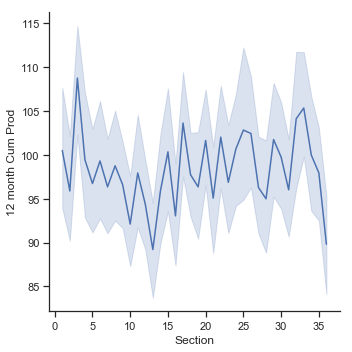

In [204]:
#Section vs 12 Month Cumulative Production
sns.relplot(x = "Section", y = "12 month Cum Prod", data = DatabaseDF, kind = "line")

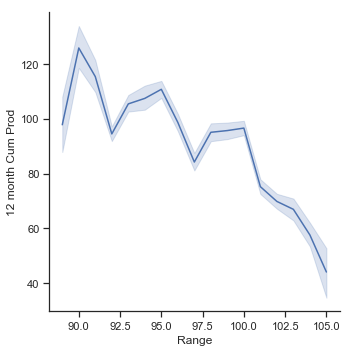

In [205]:
#Range versus 12 Month Cumulative Production
sns.relplot(x = "Range", y = "12 month Cum Prod", data = DatabaseDF, kind = "line") 

The range has a negative association with the oil production. As the range increases, the oil production decreases. Therefore, the lower the range, the more oil will be produced.

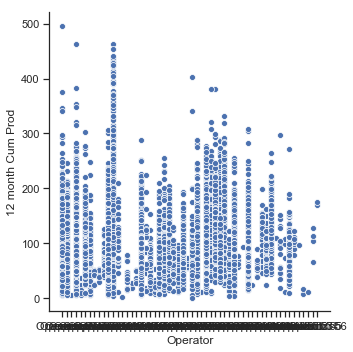

In [206]:
#Operator Number versus 12 Month Cumulative Production
sns.relplot(x = "Operator", y = "12 month Cum Prod", data = DatabaseDF) 

This graph shows the oil production of each operator. The lower number operators tend to have higher production values when comparing to the other operators.

In [207]:
#finding Pearson's correlation coefficient for features
pearsoncorr = DatabaseDF.corr(method = 'pearson')
pearsoncorr

Unnamed: 0  Lateral Length    Stages  Township      Range  \
Unnamed: 0           1.000000        0.053661  0.228829   0.243115  0.011720   
Lateral Length       0.053661        1.000000  0.456774  -0.038726  0.241831   
Stages               0.228829        0.456774  1.000000   0.040092  0.147589   
Township             0.243115       -0.038726  0.040092   1.000000 -0.011333   
Range                0.011720        0.241831  0.147589  -0.011333  1.000000   
Section             -0.050113       -0.021131  0.024033   0.023008 -0.019859   
Total Prop, lbs      0.203161        0.253713  0.587432  -0.005835 -0.021746   
Fluid, bbls          0.213521        0.256175  0.520606  -0.006636  0.194991   
Best1 Mo BOPD        0.094560        0.113087  0.265778  -0.121909 -0.164083   
Best3 Mo BOPD        0.096491        0.113343  0.263466  -0.110662 -0.192811   
Best6 Mo BOPD        0.104318        0.103529  0.251608  -0.101472 -0.216421   
Best9 Mo BOPD        0.114553        0.098252  0.242121  -0.092244 -0.226095   
Best12 Mo BOPD       0.121250        0.093744  0.227370  -0.081699 -0.238771   
Latitude             0.245966       -0.037672  0.038070   0.998011 -0.009201   
Longitude           -0.052245       -0.233496 -0.154342  -0.145898 -0.983505   
SPACING_CAPPED      -0.107073       -0.147507 -0.245130   0.014882  0.009955   
12 month Cum Prod    0.119804        0.147342  0.344700  -0.114935 -0.194452   
Sleeves              0.186390        0.391450  0.894700   0.061510  0.112901   
P&P                  0.173148        0.528658  0.880684  -0.008466  0.133063   
Frac Ports          -0.711513       -0.087372  0.193914  -0.756806  0.602259   
Repeater Ports       0.535451        0.349897  0.078326   0.716801  0.045222   
CT                   0.191782        0.391838  0.983473   0.011609 -0.185800   
Year Drilled         0.186718        0.313809  0.718240  -0.001583  0.164663   

                    Section  Total Prop, lbs  Fluid, bbls  Best1 Mo BOPD  \
Unnamed: 0        -0.050113         0.203161     0.213521       0.094560   
Lateral Length    -0.021131         0.253713     0.256175       0.113087   
Stages             0.024033         0.587432     0.520606       0.265778   
Township           0.023008        -0.005835    -0.006636      -0.121909   
Range             -0.019859        -0.021746     0.194991      -0.164083   
Section            1.000000         0.020073     0.017878       0.010863   
Total Prop, lbs    0.020073         1.000000     0.714701       0.371468   
Fluid, bbls        0.017878         0.714701     1.000000       0.241188   
Best1 Mo BOPD      0.010863         0.371468     0.241188       1.000000   
Best3 Mo BOPD      0.012004         0.408457     0.260443       0.964461   
Best6 Mo BOPD      0.010873         0.422335     0.276661       0.930272   
Best9 Mo BOPD      0.007916         0.422783     0.290054       0.912720   
Best12 Mo BOPD     0.005923         0.417017     0.281228       0.902600   
Latitude          -0.037652        -0.007611    -0.008240      -0.123385   
Longitude          0.016787         0.020765    -0.194170       0.181494   
SPACING_CAPPED    -0.010710        -0.161274    -0.166497      -0.131038   
12 month Cum Prod  0.004276         0.480937     0.392504       0.874867   
Sleeves            0.033284         0.501151     0.346689       0.196826   
P&P                0.008336         0.553368     0.542364       0.206115   
Frac Ports         0.459620         0.469282     0.579526       0.328419   
Repeater Ports    -0.436849         0.004144     0.173785      -0.593844   
CT                 0.098984        -0.487679    -0.499150       0.445904   
Year Drilled       0.029651         0.535724     0.538226       0.193007   

                   Best3 Mo BOPD  ...  Latitude  Longitude  SPACING_CAPPED  \
Unnamed: 0              0.096491  ...  0.245966  -0.052245       -0.107073   
Lateral Length          0.113343  ... -0.037672  -0.233496       -0.147507   
Stages                  0.263466  ...  

In [208]:
#set variables for Windrose Chart
spacing = DatabaseDF['SPACING_CAPPED']
production = DatabaseDF['12 month Cum Prod']

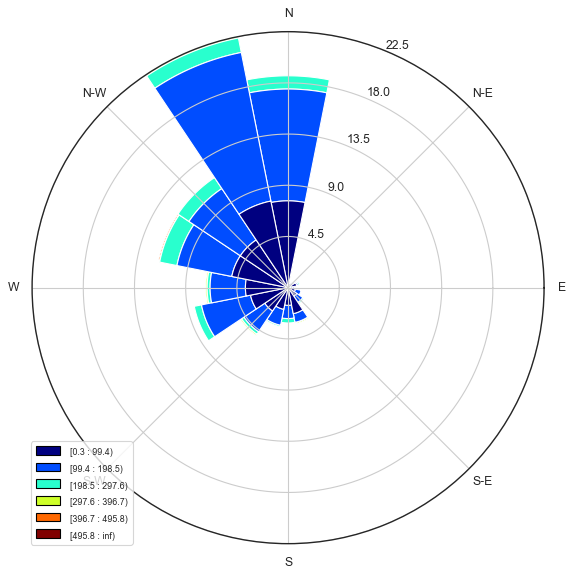

In [209]:
#Plot Windrose Chart
ax = WindroseAxes.from_ax()
ax.bar(spacing, production, normed=True, opening=1, edgecolor='white')
ax.set_legend() 

In [210]:
#set variables for Windrose Chart
spacing = DatabaseDF['Fluid, bbls']
production = DatabaseDF['12 month Cum Prod']

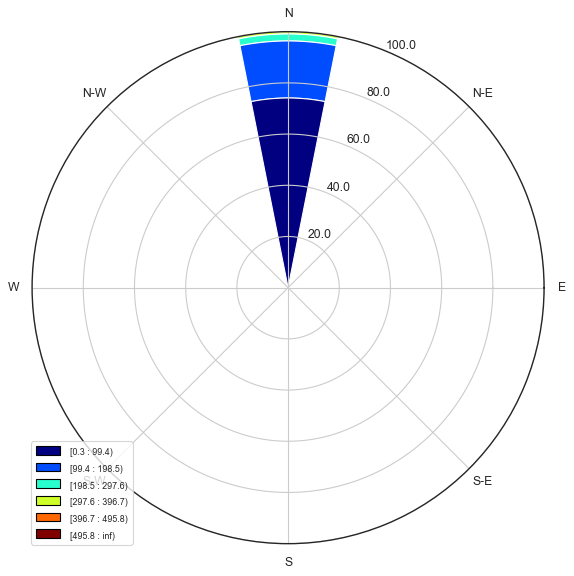

In [211]:
#Plot Windrose Chart
ax = WindroseAxes.from_ax()
ax.bar(spacing, production, normed=True, opening=1, edgecolor='white')
ax.set_legend() 

In [212]:
#import bokeh 
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

In [213]:
#plot empty graph
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Example Glyphs',
           x_axis_label = 'X', y_axis_label = 'Y')
output_notebook()
show(p)

Loading BokehJS ...

In [214]:
#column summary
DatabaseDF['12 month Cum Prod'].describe()

count    10856.000000
mean        98.421863
std         54.173541
min          0.280000
25%         60.917500
50%         88.970000
75%        124.847500
max        495.810000
Name: 12 month Cum Prod, dtype: float64

In [215]:
#set up histogram
range_data = DatabaseDF['12 month Cum Prod'].max() - DatabaseDF['12 month Cum Prod'].min()
arr_hist, edges = np.histogram(DatabaseDF['12 month Cum Prod'], 
                               bins = int(range_data/5), 
                               range = [0.28, 496])
# Put the information in a dataframe
delays = pd.DataFrame({'12 month Cum Prod': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})

In [216]:
#Set labels
p = figure(plot_height = 500, plot_width = 500, 
           title = 'Cumulative Production',
          x_axis_label = 'Total Prop, lbs', 
           y_axis_label = 'Fluid, bbls')

#Set quad function
p.quad(bottom=0, top=DatabaseDF['Fluid, bbls'], 
        left=DatabaseDF['Fluid, bbls'], right=DatabaseDF['Total Prop, lbs'], 
       fill_color='red', line_color='black')

GlyphRenderer(id='7173', ...)

In [217]:
#Show graph
show(p)

In [218]:
#set up histogram
range_data = DatabaseDF['12 month Cum Prod'].max() - DatabaseDF['12 month Cum Prod'].min()
arr_hist, edges = np.histogram(DatabaseDF['12 month Cum Prod'], 
                               bins = int(range_data/5), 
                               range = [0.28, 496])
# Put the information in a dataframe
delays = pd.DataFrame({'12 month Cum Prod': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})

In [219]:
#Set labels
p = figure(plot_height = 500, plot_width = 500, 
           title = 'Cumulative Production',
          x_axis_label = 'Section', 
           y_axis_label = 'Range')

#Set quad function
p.quad(bottom=0, top=DatabaseDF['Range'], 
        left=DatabaseDF['Section'], right=DatabaseDF['Range'], 
       fill_color='red', line_color='black')

GlyphRenderer(id='7494', ...)

In [220]:
#Show graph
show(p)

In [221]:
#import bokeh
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row 
from bokeh.plotting import figure

In [222]:
#Show scatter plot
p = figure(title = "Longitude v Latitude")
p.circle('Longitude','Latitude',source=DatabaseDF,fill_alpha=0.1, size=8)
show(p)

In [223]:
# output to notebook 
output_notebook() 
  
# create figure 
p = figure(plot_width = 400, plot_height = 400) 
   
# add a line renderer 
p.line(DatabaseDF['Year Drilled'], DatabaseDF['12 month Cum Prod'],  
        line_width = 2, color = "green") 
  
# show the results 
show(p) 


Loading BokehJS ...